# Homework 6: Probability, Simulation, Estimation, and Assessing Models

**Reading**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/randomness.html) 
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/sampling-and-empirical-distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. The cell above with import the autograder. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#import otter
#grader = otter.Notebook()


## 1. Probability


We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you several proposed answers. You must assign the provided variable to your choice.



You are more than welcome to create more cells across this notebook to use for arithmetic operations 

**Question 1.** You roll a 6-sided die 3 times. What is the chance of getting 3 sixes?

1. $\displaystyle 1-\left(\frac{1}{6}\right)^{3}$

2. $\displaystyle \left(\frac{5}{6}\right)^{3}$

3. $\displaystyle \left(\frac{1}{6}\right)^{3}$

Below, enter a, b or c, according to your selection.  

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

If you like, you can run this cell that contains a simulation of rolling a die 3 times and counting the number of 6's.  (Don't expect the result to be exactly right, simulations are often just approximately right.)


In [25]:
die = make_array(0,0,0,0,0,1)
sixes_in_three = make_array()

for i in np.arange(10000):
    three_rolls = np.random.choice(die, 3, replace=True)
    sixes_in_three = np.append(sixes_in_three, sum(three_rolls))

round(sum(sixes_in_three == 3)/10000, 4)


0.0045

In [26]:
three_sixes = ...
three_sixes

Ellipsis

**Question 2.** Take the same problem set-up as before, rolling a fair dice 3 times. What is the chance that every roll is less than or equal to 5?

1. $\displaystyle 1-\left(\frac{1}{6}\right)^{3}$

2. $\displaystyle \left(\frac{5}{6}\right)^{3}$

3. $\displaystyle \left(\frac{1}{6}\right)^{3}$

Assign `five_or_less` to either 1, 2, or 1. 

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

Again, a simulation is provided to help you make the right decision.  

In [27]:
die = make_array(0,0,0,0,0,1)
sixes_in_three = make_array()

for i in np.arange(10000):
    three_rolls = np.random.choice(die, 3, replace=True)
    sixes_in_three = np.append(sixes_in_three, sum(three_rolls))

round(sum(sixes_in_three == 0)/10000, 4)

0.5684

In [28]:
five_or_less = ...
five_or_less

Ellipsis

**Question 3.** Assume we are picking a lottery ticket. We must choose three distinct numbers from 1 to 20 and write them on a ticket. Next, someone picks three numbers one by one from a bowl with numbers from 1 to 20 each time without putting the previous number back in. We win if our numbers are all called *any* in order. 

If we decide to play the game and pick our numbers as 12, 14, and 18, what is the chance that we win? 

Our proposed answers: 

1. $\displaystyle \left(\frac{3}{20}\right)^3$

2. $\displaystyle \left(\frac{6}{20 \cdot 19 \cdot 18}\right)$

3. $\displaystyle \left(\frac{12\cdot14\cdot18}{20 \cdot 19 \cdot 18}\right)$

Assign `lottery` to either 1, 2, or 3. 

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [29]:
wins = 0
reps = 500000

for i in np.arange(reps):
    picks= [np.random.choice(np.arange(1,21)), np.random.choice(np.arange(1,21)), np.random.choice(np.arange(1,21))]
    if   picks == [12, 14, 18]:
        wins = wins + 1
    elif picks == [12, 18, 14]:
        wins = wins + 1
    elif picks == [14, 12, 18]:
        wins = wins + 1
    elif picks == [14, 18, 12]:
        wins = wins + 1
    elif picks == [18, 12, 14]:
        wins = wins + 1
    elif picks == [18, 14, 12]:
        wins = wins + 1

wins/reps


0.000778

In [30]:
lottery = ...

**Question 3.2.** How would the probability change if the numbers HAD to be in ORDER for us to win?

1. The probability goes down.

2. The probability is actually the same.

3. The probability goes up.

In [31]:
lottery_with_order = ...

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [20,10,30], while list B contains the numbers [10,30,20,40,30]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we drew from list A is larger than or equal to the number we drew from list B?

Our proposed solutions: 

1. $\displaystyle \frac{7}{15}$

2. $\displaystyle \frac{3}{5}$

4. $\displaystyle \frac{1}{5}$

Assign `list_chances` to either 1, 2, or 3. 

*Hint: Consider the different possible ways that the items in List A can be greater than or equal to items in List B. Try working out your thoughts with a pencil and paper, what do you think the correct solutions will be close to?*

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [32]:
listA = make_array(10, 20, 30)
listB = make_array(10, 20, 30, 30, 40)
greater_or_equal_count = 0

for i in np.arange(reps):
    pickA = np.random.choice(listA)
    pickB = np.random.choice(listB)
    if pickA >= pickB:
        greater_or_equal_count = greater_or_equal_count + 1
        
greater_or_equal_count/reps


0.467242

In [33]:
list_chances = ...

## 2. Monkeys Typing Shakespeare
##### (...or at least the string "datascience")

A monkey is banging repeatedly on the keys of a special keyboard. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet and any number between 0-9 (inclusive), regardless of what it has hit before. There are no other keys on the keyboard.

This question is inspired by a mathematical theorem called the Infinite monkey theorem (<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

**Question 1.** Suppose the monkey hits the keyboard 4 times.  Compute the chance that the monkey types the sequence `data`.  (Call this `data_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [34]:
data_chance = 1/36**4
data_chance

5.953741807651273e-07

In [35]:
# We have provided the code below to compute a list called keys,
# containing all the lower-case English letters, upper-case English letters, and the digits 0-9 (inclusive).  Print it if you
# want to verify what it contains.
import string
keys = list(string.ascii_lowercase + string.digits)

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(keys)

def simulate_several_key_strikes(num_strikes):
    """Simulates one random key strike."""
    return "".join(np.random.choice(keys, num_strikes, replace = True))

**Question 2.** Run `simulate_several_key_strikes(4)` in the cell below.



In [12]:
simulate_several_key_strikes(4)

'ofdy'

**Question 3.** Complete the code for the simulation below. 

+ Set reps equal to 500000.

+ Set `num_keys` equal to the number of letters in the word *data*.

+ Set your target equal to <span style="color:#BA2121" style="font:bold">"data"</span>

The <span style="color:#008000" style="font:bold"><b>for</b></span> statement calls `simulate_several_key_strikes` reps times, each time simulating the monkey striking num_keys times. Using the <span style="color:#008000" style="font:bold"><b>if</b></span> statement, count the number of times the result is whatever you set the target equal to.  Finally, it computes the proportion of times the monkey types the target, then calls that proportion `data_proportion`.




In [40]:
num_keys = ...

target = ...

reps = ...

## Change nothing below this line
count = 0
for i in np.arange(reps):
    if simulate_several_key_strikes(num_keys) == target:
        count = count + 1
        
data_proportion = count / reps 
data_proportion

TypeError: unsupported operand type(s) for -: 'ellipsis' and 'int'

**Question 4.** Check the value your simulation computed for `data_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"data"` in 4 strikes (the answer to question 1)?  Why or why not?  If you rerun it, do you get consistent answers?

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

**Question 5.** Compute the chance that the monkey types the letter `"t"` at least once in the 5 strikes.  Call it `t_chance`. Use algebra and type in an arithmetic equation that Python can evalute. 

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [39]:
t_chance = 1 - (35/36)**4
t_chance

0.10656661998933092

**Question 6.** Do you think that a computer simulation is more or less effective to estimate `t_chance` compared to when we tried to estimate `data_chance` this way? Why or why not? (You don't need to write a simulation, but you can run ours several times and you should see that the probability is pretty close to the one you calculated earlier.)



In [37]:
## t_chance simulation

count = 0
for i in np.arange(5000):
    draws = 0
    while draws < 4:
        draws = draws + 1
        if simulate_key_strike() == 't':
            count = count + 1
            draws = 4

count/5000            

0.1076

*Write your answer here, replacing this text.*

## 3. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2019-2020 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com).

Run the next cell to load the two datasets.

In [4]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Player,3P,2P,PTS
Steven Adams,0,4.4,10.7
Bam Adebayo,0,6.2,15.8
LaMarcus Aldridge,1.2,6.3,19.1


Name,Salary
Stephen Curry,40231758
Chris Paul,38506482
Russell Westbrook,38178000


**Question 1**  Using `.join` method we merged these two tables into one by matching information in a specified column.  In case you ever have to do this, the format is this:

first_table.join(<span style="color:#BA2121" >"First Variable Name" </span>, second_table, <span style="color:#BA2121" >"Second Variable Name" </span>)

However, this was done for you for this problem.  The dataset is called *player_salary_data.csv*.  Use `Table.read_table` to read this in and name it `full_data`.  


In [ ]:
full_data = Table.read_table("player_salary_data.csv")

full_data

Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of 3 pointers and free throws the player scored in a season for every **\$100000 of salary** (*Note*: the `Salary` column is in dollars, not hundreds of thousands of dollars). For example, Al Horford scored an average of 5.2 points for 3 pointers and free throws combined, and has a salary of **\$28 million.** This is equivalent to 280 thousands of dollars, so his value is $\frac{5.2}{280}$. The formula is:

$$\frac{\text{"PTS"} - 2 * \text{"2P"}}{\text{"Salary"}\ / \ 100000}$$

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative and don't forget your units!** Remember that `hist()` takes in an optional third argument that allows you to specify the units, such as unit <span style="color:#AA22FF" ><b>=</b></span> <span style="color:#BA2121" > "Pts / $100K" </span>. Refer to the python reference to look at `tbl.hist(...)` if necessary.

*Just so you know:* Informative histograms contain a majority of the data and **exclude outliers**



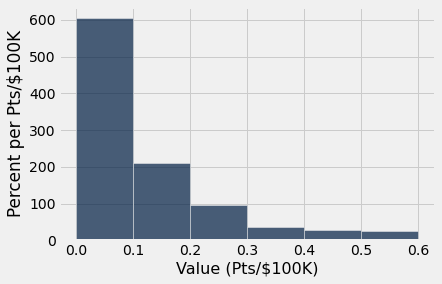

In [52]:
bins = np.arange(0, 0.7, .1) # Use this provided bins when you make your histogram

value = ...

full_data_with_value = ...



Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 50 players' salaries.  The cell below loads those data.

In [8]:
sample_data = Table.read_table("sample_player_salary_data.csv")
sample_data.show(3)

Player,3P,2P,PTS,Salary
Abdel Nader,0.7,1.3,5.7,1618520
Alize Johnson,0,0.6,1.6,1416852
Andre Drummond,0.1,7.3,17.7,27093019


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`.  

Then compute value, using the same method for measuring value we used in question 2. Make sure to specify the units again in the histogram as stated in the previous problem. **Use the same bins, too.**  

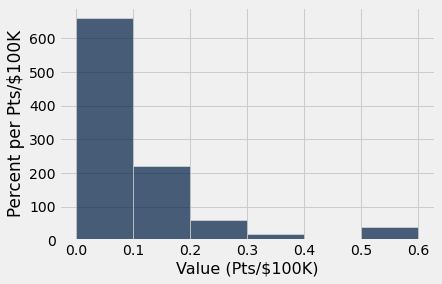

In [9]:
bins = np.arange(0, 0.7, .1) # Use this provided bins when you make your histogram

value = ...

sample_data_with_value = ...



Now let us summarize what we have seen.  To guide you, we have written most of the summary already.

**Question 4.** Complete the statements below by setting each relevant variable name to the value that correctly fills the blank.

* The plot in question 2 displayed a(n) [`distribution_1`] distribution of the population of [`player_count_1`] players.  The areas of the bars in the plot sum to [`area_total_1`].

* The plot in question 3 displayed a(n) [`distribution_2`] distribution of the sample of [`player_count_2`] players.  The areas of the bars in the plot sum to [`area_total_2`].

`distribution_1` and `distribution_2` should be set to one of the following strings: `"empirical"` or `"probability"`. 

`player_count_1`, `area_total_1`, `player_count_2`, and `area_total_2` should be set to integers.

Remember that areas are represented in terms of percentages.

*Hint 1:* For a refresher on distribution types, check out [Section 10.1](https://www.inferentialthinking.com/chapters/10/1/empirical-distributions.html)

*Hint 2:* The `hist()` table method ignores data points outside the range of its bins, but you may ignore this fact and calculate the areas of the bars using what you know about histograms from lecture.

<!--
BEGIN QUESTION
name: q3_4
-->

In [41]:
distribution_1 = ...
player_count_1 = ...
area_total_1 = ...

distribution_2 = ...
player_count_2 = ...
area_total_2 = ...

**Question 5.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.3, or above 0.3? Explain your answer. 

<!--
BEGIN QUESTION
name: q3_5
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## 4. Assessing Jade's Models
#### Games with Jade

Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We each place 10 one dollar bills on the table.  Then Jade flips a coin.  If it comes up heads, she picks up a dollar and if it's tails,  I pick up a dollar.  We keep playing until all 20 of the dollars have been claimed. 
> 
> Jade wins 15 times, thus gaining \$5.

We later learn that Jade has been studying close-up magic, and has been learning to toss and catch a coin so as to produce a certain outcome.  We confront Jade about cheating and she claims that she did not use her skills as a prestidigitator during our contest.  She tries to convince us that the coin was fair and had an equal chance of landing on heads or tails.  

#### Question 1
Assign `model_probabilities` to a two-item array containing the chance of head as the first element, and the chance of tails as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1, and sum to 1.  

<!--
BEGIN QUESTION
name: q5_1
manual: false
-->

In [57]:
model_probabilities = ...
model_probabilities

array([0.5, 0.5])

**Question 2**

Before you accuse a friend of cheating, we should have strong evidence.  Instead of the usual $\alpha$ of 0.05 we will adjust our level of significance.  If we want to be more sure that our evidence is strong, which direction should we adjust our $\alpha$, up or down?  To make this simple, we'll choose between two possible values of $\alpha$.  Should we set it to 0.03 or 0.07?

In [58]:
## If you think alpha should go down, set it to 0.03
## If you think alpha should go up, set it to 0.07

alpha = ...

**Question 3**

We believe Jade's model is incorrect. In particular, we believe there to be a  larger chance of getting a heads.  Which of the following statistics is the simplest logical choice for a statistic we could use in this simulation.  Assign `statistic_choice` to the correct answer. 

1. The actual number of heads we get in 20 flips.
2. The difference between the actual number of heads in 20 flips and the expected number of heads in 10 flips (10).
3. The distance (absolute value of difference) between the actual number of heads in 20 flips and the expected number of heads in 20 flips (10).
4. The expected number of heads in 20 flips (10).


In [59]:
statistic_choice = ...

statistic_choice

1

**Question 4**

In the next two cells, we are going to define and run a simulation to assess whether Jade is most likely cheating.  First, you must decide how many repetitions the simulation should include.  Set `repetitions` to an amount that results in a histogram that appears approximately normal. For reference, the histogram below appears approximately normal.  


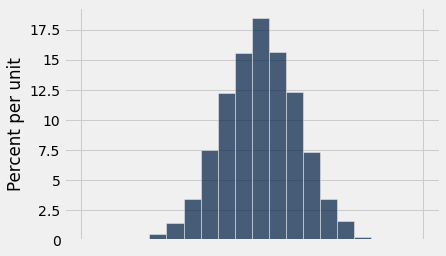



*There are many possible reasonable answers, and you can change your answer if your histogram doesn't look appropriate.*

For now, it is set to 5, which is **NOT** a reasonable amount. 

In [66]:
repetitions = 5

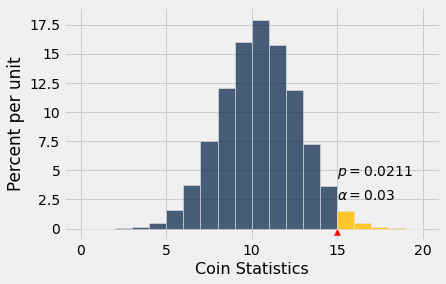

In [67]:
## Run this cell

coin_statistics = make_array()

def simulation_and_statistic(sample_size, model_proportions):
    return sample_size * sample_proportions(sample_size, model_proportions).item(0)

for i in np.arange(repetitions):
    coin_statistics =(np.append(coin_statistics, 
                simulation_and_statistic(20, model_probabilities)))

if statistic_choice == 4:
    print("This is the wrong statistic_choice.  Go back and try Question 2 again.")
elif statistic_choice == 3:
    print("This is a bad choice for your statistic_choice, why?")
    coin_statistics = np.abs(coin_statistics - 10)
    bins = np.arange(0, 11)
    obs = 5
    stat = sum(coin_statistics >= obs)/repetitions
    Table().with_column('Coin Statistics', coin_statistics).hist('Coin Statistics', bins = bins, left_end=obs)
    plt.ylim(-0.01, .35)
    plt.scatter(obs, -0.003, marker = '^', color = "red")
    plt.text(obs, 0.055, "$p = $"+ str(np.round(stat, 4)))
    plt.text(obs, 0.035, r"$\alpha = $" + str(alpha));
elif statistic_choice == 2:
    print("This choice is not the best, but it is acceptable.")
    coin_statistics = coin_statistics - 10
    bins = np.arange(-11, 11)
    obs = 5
    stat = sum(coin_statistics >= obs)/repetitions
    Table().with_column('Coin Statistics', coin_statistics).hist('Coin Statistics', bins = bins, left_end=obs)
    plt.ylim(-0.01, .19)
    plt.scatter(obs, -0.003, marker = '^', color = "red")
    plt.text(obs, 0.045, f"$p = ${np.round(stat, 4)}")
    plt.text(obs, 0.025, r"$\alpha = $" + str(alpha));
elif statistic_choice == 1:
    bins = np.arange(0, 21)
    obs = 15
    stat = sum(coin_statistics >= obs)/repetitions
    Table().with_column('Coin Statistics', coin_statistics).hist('Coin Statistics', bins = bins, left_end=obs)
    plt.ylim(-0.01, .19)
    plt.scatter(obs, -0.003, marker = '^', color = "red")
    plt.text(obs, 0.045, f"$p = ${np.round(stat, 4)}")
    plt.text(obs, 0.025, r"$\alpha = $" + str(alpha));
else:
    print("You did not enter a valid choice.  Try Question 2 again.")

#### Question 5
Quoting a p-value, state in context whether you believe Jade was cheating or not.  

*Write your answer here, replacing this text.*